In [39]:
## Predicting Loan Defaulters with Machine Learning Models for Credit Card Management 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings

# Ignore only DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here


In [41]:
# Importing Dataset

In [42]:
dataset=pd.read_csv("fraudTrain.csv")

In [43]:
dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [44]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
Unnamed: 0               1296675 non-null int64
trans_date_trans_time    1296675 non-null object
cc_num                   1296675 non-null int64
merchant                 1296675 non-null object
category                 1296675 non-null object
amt                      1296675 non-null float64
first                    1296675 non-null object
last                     1296675 non-null object
gender                   1296675 non-null object
street                   1296675 non-null object
city                     1296675 non-null object
state                    1296675 non-null object
zip                      1296675 non-null int64
lat                      1296675 non-null float64
long                     1296675 non-null float64
city_pop                 1296675 non-null int64
job                      1296675 non-null object
dob                      1296675 non-null object
trans_

In [46]:
dataset.dropna(inplace=True)

In [47]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [48]:
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


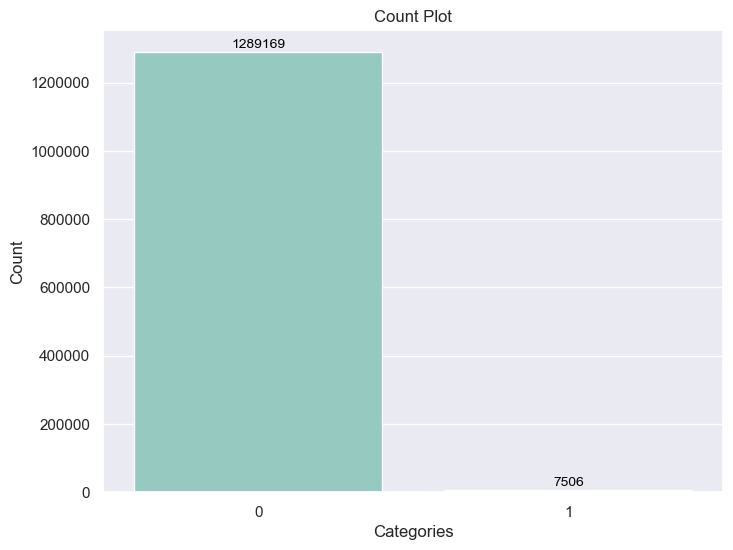

In [49]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x='is_fraud', data=dataset, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [50]:
object_cols = dataset.select_dtypes(include=['object']).columns

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [51]:
dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,162,18,0,568,...,36.0788,-81.1781,3495,370,779,56438,1325376018,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,309,157,0,435,...,48.8878,-118.2105,149,428,607,159395,1325376044,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,115,381,1,602,...,42.1808,-112.2620,4154,307,302,818703,1325376051,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,163,463,1,930,...,46.2306,-112.1138,1939,328,397,544575,1325376076,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,336,149,1,418,...,38.4207,-79.4629,99,116,734,831111,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,1274786,30263540414123,499,0,15.56,121,332,1,154,...,37.7175,-112.4777,258,215,298,344658,1371816728,36.841266,-111.690765,0
1296671,1296671,1274787,6011149206456997,2,1,51.70,160,463,1,856,...,39.2667,-77.5101,100,360,630,199896,1371816739,38.906881,-78.246528,0
1296672,1296672,1274788,3514865930894695,599,1,105.93,74,67,1,158,...,32.9396,-105.8189,899,308,412,366013,1371816752,33.619513,-105.130529,0
1296673,1296673,1274789,2720012583106919,509,1,74.90,179,304,1,433,...,43.3526,-102.5411,1126,485,639,1086299,1371816816,42.788940,-103.241160,0


In [52]:
X=dataset.iloc[:,0:22]

In [53]:
X

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,0,2703186189652095,514,8,4.97,162,18,0,568,...,28654,36.0788,-81.1781,3495,370,779,56438,1325376018,36.011293,-82.048315
1,1,1,630423337322,241,4,107.23,309,157,0,435,...,99160,48.8878,-118.2105,149,428,607,159395,1325376044,49.159047,-118.186462
2,2,2,38859492057661,390,0,220.11,115,381,1,602,...,83252,42.1808,-112.2620,4154,307,302,818703,1325376051,43.150704,-112.154481
3,3,3,3534093764340240,360,2,45.00,163,463,1,930,...,59632,46.2306,-112.1138,1939,328,397,544575,1325376076,47.034331,-112.561071
4,4,4,375534208663984,297,9,41.96,336,149,1,418,...,24433,38.4207,-79.4629,99,116,734,831111,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,1274786,30263540414123,499,0,15.56,121,332,1,154,...,84735,37.7175,-112.4777,258,215,298,344658,1371816728,36.841266,-111.690765
1296671,1296671,1274787,6011149206456997,2,1,51.70,160,463,1,856,...,21790,39.2667,-77.5101,100,360,630,199896,1371816739,38.906881,-78.246528
1296672,1296672,1274788,3514865930894695,599,1,105.93,74,67,1,158,...,88325,32.9396,-105.8189,899,308,412,366013,1371816752,33.619513,-105.130529
1296673,1296673,1274789,2720012583106919,509,1,74.90,179,304,1,433,...,57756,43.3526,-102.5411,1126,485,639,1086299,1371816816,42.788940,-103.241160


In [54]:
y=dataset.iloc[:,-1]

In [55]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [56]:
#Datasplitting

In [57]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)

In [58]:
X_train.shape

(1037340, 22)

In [59]:
X_test.shape

(259335, 22)

In [60]:
y_train.shape

(1037340,)

In [61]:
y_test.shape

(259335,)

In [62]:
#Building a ML Model

In [63]:
labels=['Normal','Fraud']

In [64]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [65]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Naive Bayes

Model loaded successfully.


c:\users\sai deeak\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NBC Accuracy    : 99.42583916555806
NBC Precision   : 49.71291958277903
NBC Recall      : 50.0
NBC FSCORE      : 49.856046529164836


c:\users\sai deeak\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 NBC classification report
               precision    recall  f1-score   support

      Normal       1.00      0.99      1.00    259335
       Fraud       0.00      0.00      0.00         0

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       1.00      0.99      1.00    259335



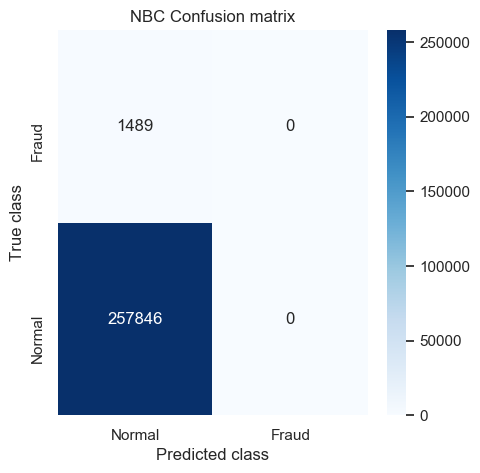

In [66]:
from sklearn.naive_bayes import GaussianNB
if os.path.exists('NBC.pkl'):
    # Load the trained model from the file
    clf = joblib.load('NBC.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("NBC", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = GaussianNB()      # CALL FUN
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'NBC.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("NBC", predict, y_test)

# KNN Classifier

Model loaded successfully.
KNN Accuracy    : 99.72892205062949
KNN Precision   : 88.27938027401305
KNN Recall      : 87.84483732974302
KNN FSCORE      : 88.06085187612078

 KNN classification report
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    257863
       Fraud       0.76      0.77      0.76      1472

    accuracy                           1.00    259335
   macro avg       0.88      0.88      0.88    259335
weighted avg       1.00      1.00      1.00    259335



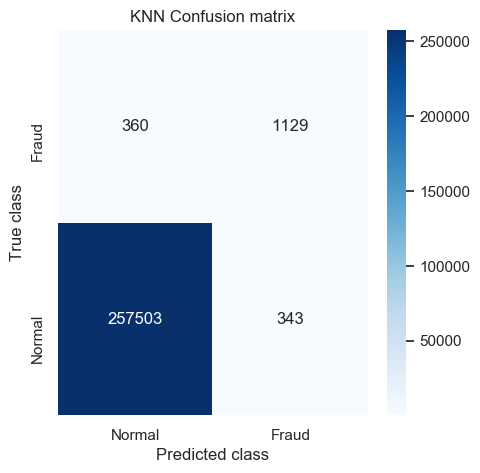

In [67]:
from sklearn.neighbors import KNeighborsClassifier
if os.path.exists('KNN.pkl'):
    # Load the trained model from the file
    clf = joblib.load('KNN.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("KNN", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'KNN.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("KNN", predict, y_test)

In [68]:
#showing all algorithms performance values
columns = ["Algorithm Name","Accuracy","Precison","Recall","FScore"]
values = []
algorithm_names = ["NBC", "KNN"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],accuracy[i],precision[i],recall[i],fscore[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Accuracy,Precison,Recall,FScore
0,NBC,99.425839,49.71292,50.000000,49.856047
1,KNN,99.728922,88.27938,87.844837,88.060852


In [69]:
test=pd.read_csv("test1.csv")

In [70]:
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,...,90403,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970
1,1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,...,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416
2,800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,...,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550
3,398945,2019-06-30 18:43:08,4716561796955522,fraud_Lynch-Wisozk,home,42.09,Lauren,Anderson,F,11014 Chad Lake Apt. 573,...,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,dbf6c06d3277438afdf7af883fb4285f,1341081788,48.310513,-112.837535
4,207455,2019-04-15 19:57:49,3528407217576457,fraud_Fisher-Schowalter,shopping_net,4.24,Patricia,Leach,F,71309 Martinez Stravenue,...,37663,36.4715,-82.4834,87124,Warden/ranger,1987-02-14,88814660aba0101b174e1e8137f4a7af,1334519869,37.329094,-82.070746
5,758837,2019-11-20 22:18:56,4365382885912355,"fraud_Kovacek, Dibbert and Ondricka",grocery_pos,312.51,Robert,Goodman,M,956 Paul Fields Suite 108,...,55771,48.1439,-92.8561,1680,Horticultural therapist,1976-12-10,3143b9b06d7bd984ac83aff3ac5721c3,1353449936,48.488032,-92.519786
6,981412,2020-02-02 23:13:33,180048185037117,fraud_Bednar PLC,kids_pets,20.53,Mary,Wall,F,2481 Mills Lock,...,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,0989359c20244f5d7a98475ee4988f77,1359846813,40.151652,-75.278513
7,799445,2019-12-04 01:53:21,4102003771126577611,fraud_Koepp-Parker,grocery_pos,264.10,William,Fitzgerald,M,715 Courtney Pike Suite 932,...,76248,32.9276,-97.2489,95035,Probation officer,1987-06-13,d1bb59cc6f2e8eb3b71d71d27e1fc55c,1354586001,33.098306,-97.968694
8,112813,2019-03-04 22:11:30,2657850734909997,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,987.73,Alan,Howard,M,04139 Johnson Prairie Suite 401,...,48206,42.3749,-83.1087,673342,Trading standards officer,1946-11-01,4a7e8b9b9affc90a4a478b6ba49bf439,1330899090,42.814546,-82.624587
9,833901,2019-12-11 22:37:25,3557442674264531,fraud_Lemke-Gutmann,shopping_net,868.00,Angela,Edwards,F,486 Wilkins Pines,...,43136,39.8013,-82.8125,460,"Lecturer, higher education",2004-06-19,894b8595b00224ea516f6a057a6dbd98,1355265445,38.819028,-82.364296


In [71]:
object_cols = test.select_dtypes(include=['object']).columns
object_cols

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [72]:
# Apply Label Encoding to each object column
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])
# Make predictions on the selected test data
predict = clf.predict(test)
predict

# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i])
        print("Row {}:*************************************Fraud Detected in Given  User Transcation Details".format(i))
        
    else:
        print(test.iloc[i])
        print("Row {}:**************************************No Fraud Detected in Given  User Transcation Details".format(i))
        


Unnamed: 0               8.117780e+05
trans_date_trans_time    6.000000e+00
cc_num                   6.761738e+11
merchant                 9.000000e+00
category                 1.000000e+00
amt                      8.619000e+01
first                    2.000000e+00
last                     1.000000e+00
gender                   0.000000e+00
street                   1.000000e+00
city                     9.000000e+00
state                    0.000000e+00
zip                      9.040300e+04
lat                      3.402870e+01
long                    -1.184924e+02
city_pop                 9.204300e+04
job                      1.000000e+00
dob                      2.000000e+00
trans_num                8.000000e+00
unix_time                1.354878e+09
merch_lat                3.328785e+01
merch_long              -1.187410e+02
Name: 0, dtype: float64
Row 0:*************************************Fraud Detected in Given  User Transcation Details
Unnamed: 0               1.101718e+06
trans_dat